## Center estimates

In [5]:
# General
import os
import glob

# Display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
import seaborn as sns

# Data treatment
import xarray as xr
import numpy as np
# from scipy.interpolate import griddata
from scipy.optimize import curve_fit
import pandas as pd 
from tqdm.notebook import tqdm
import ephem

# Default parameters
fontsize = 16
mpl.rcParams.update({'font.size': fontsize})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [6]:
PTHS = {
    'sar_pth': '/home/arthur/data/tropical_cyclones/SAR/parametric_dataset/dsg.nc',
    'sar_dir': '/home/arthur/data/tropical_cyclones/SAR/S1_RS2_RCM/sar_files/',
    'sav_dir': '/home/arthur/results/TCsLifeMonitFromObs/PRJCT_UC_DIAGNOSTIC/02_PLOT_DIAG_OCEAN/'
}

### Open data
dsg  = xr.open_dataset(PTHS['sar_pth'])

In [7]:
# GROUP BY BASIN
dsg['basin_idx'] = dsg.vmx.copy(deep=True) * np.nan
# basin_keys       = np.unique(dsg.basin)
basin_keys       = np.array(['al', 'cp', 'ep', 'wp', 'io', 'sh']) # Same order like Chavas et al 2016
for t in tqdm(range(len(dsg.time))):
    dsg['basin_idx'][t] = np.where(basin_keys == dsg.isel(time=t).basin.item())[0][0] + 1
basin_keys_combined = np.concatenate((['all'], basin_keys))

  0%|          | 0/1666 [00:00<?, ?it/s]

In [8]:
# FILTERS
cond = (
    (dsg.center_quality_flag < 2) & 
    (dsg.percent_outside < 50) & 
    (dsg.percent_rmx_inside == 1) &
    (abs(dsg.lat) < 30) & 
    (dsg.rmx < 100000) & 
    (dsg.vmx > 20) &
    (dsg.dist2coast  > dsg.r34) # Distance to coast
)
d    = dsg.where(cond, drop=True)
print(len(d.time))

501


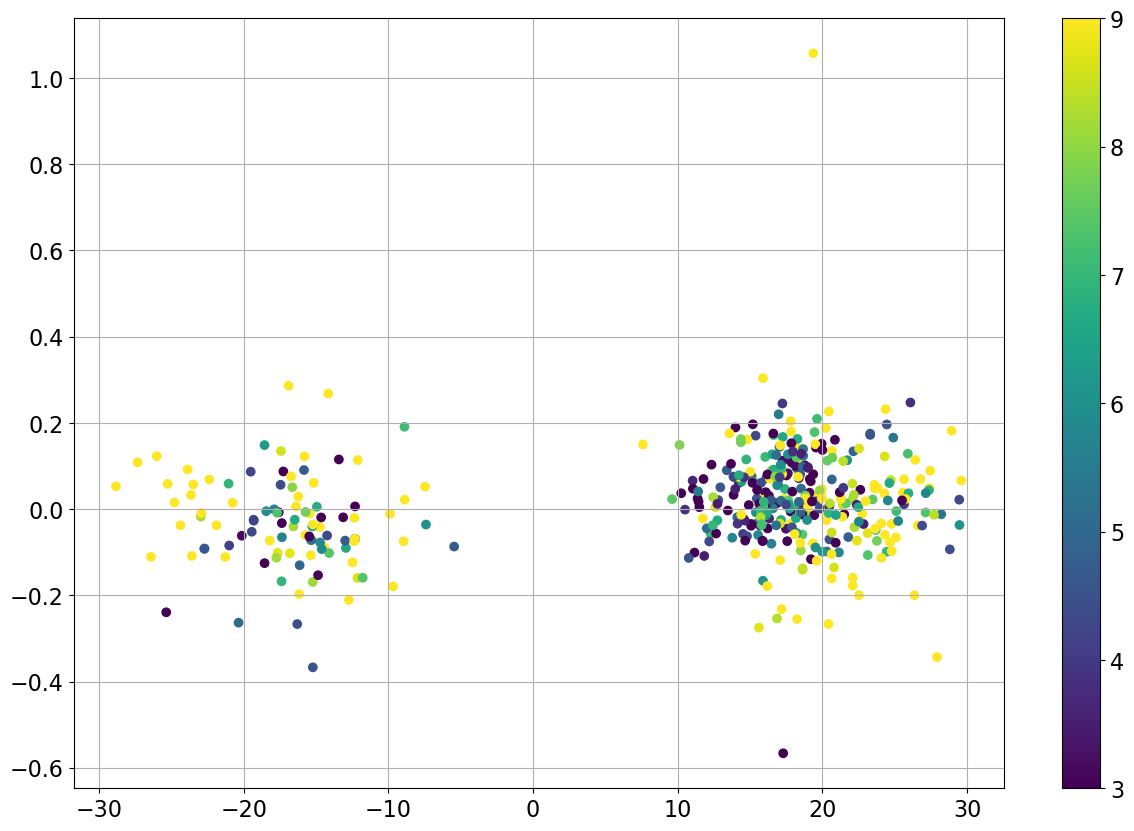

In [9]:
plt.scatter(d.lat, d.lat_ibt - d.lat, c=d.vws_pmd, vmin=3, vmax=9)
plt.colorbar()
plt.grid()

### WP

#### Lon

In [10]:
dwp = d.where(d.id.str[:2] == 'wp', drop=True)

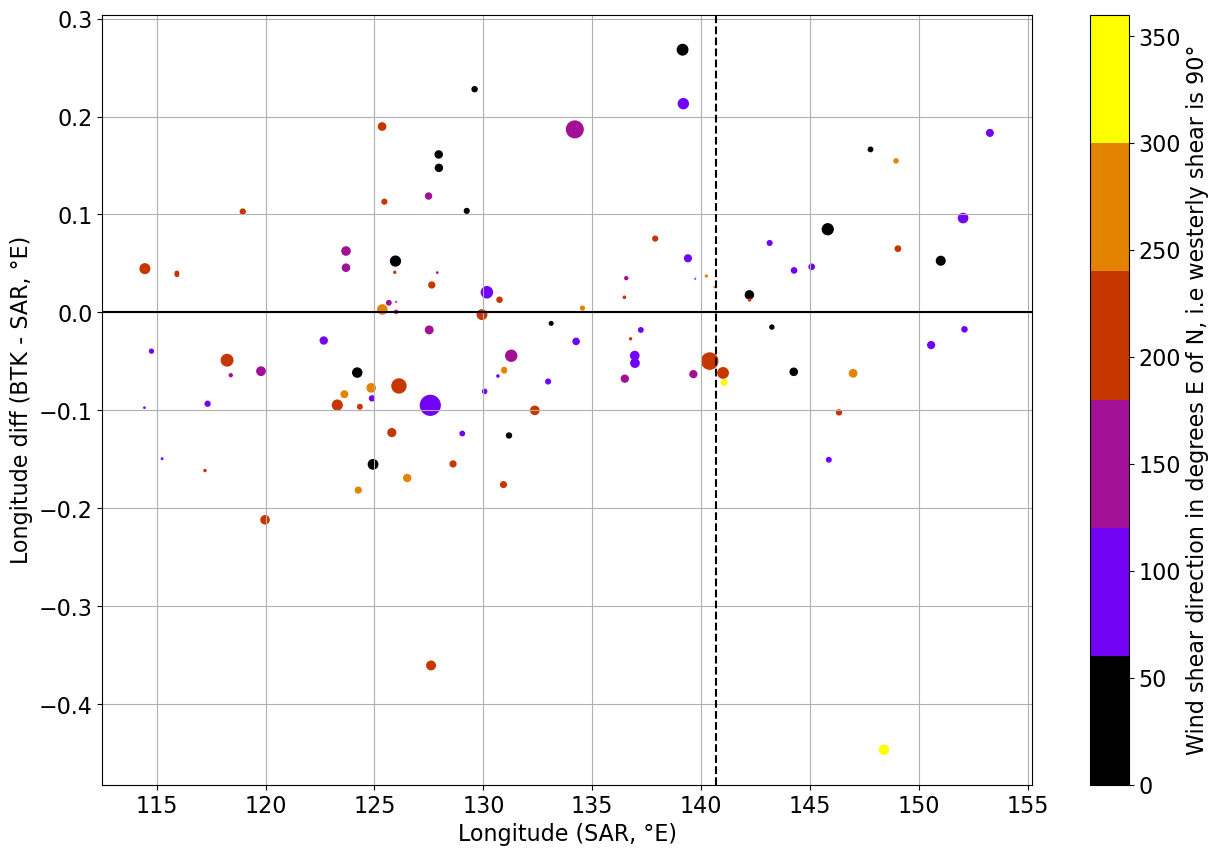

In [12]:
plt.scatter(dwp.lon, dwp.lon_ibt - dwp.lon, c=dwp.wsd_pmd, s=dwp.vws_pmd ** 2 * 0.5, cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Wind shear direction in degrees E of N, i.e westerly shear is 90°')
plt.axhline(c='k')
plt.axvline(140.7, c='k', linestyle='dashed')
plt.xlabel('Longitude (SAR, °E)')
plt.ylabel('Longitude diff (BTK - SAR, °E)')
plt.grid()

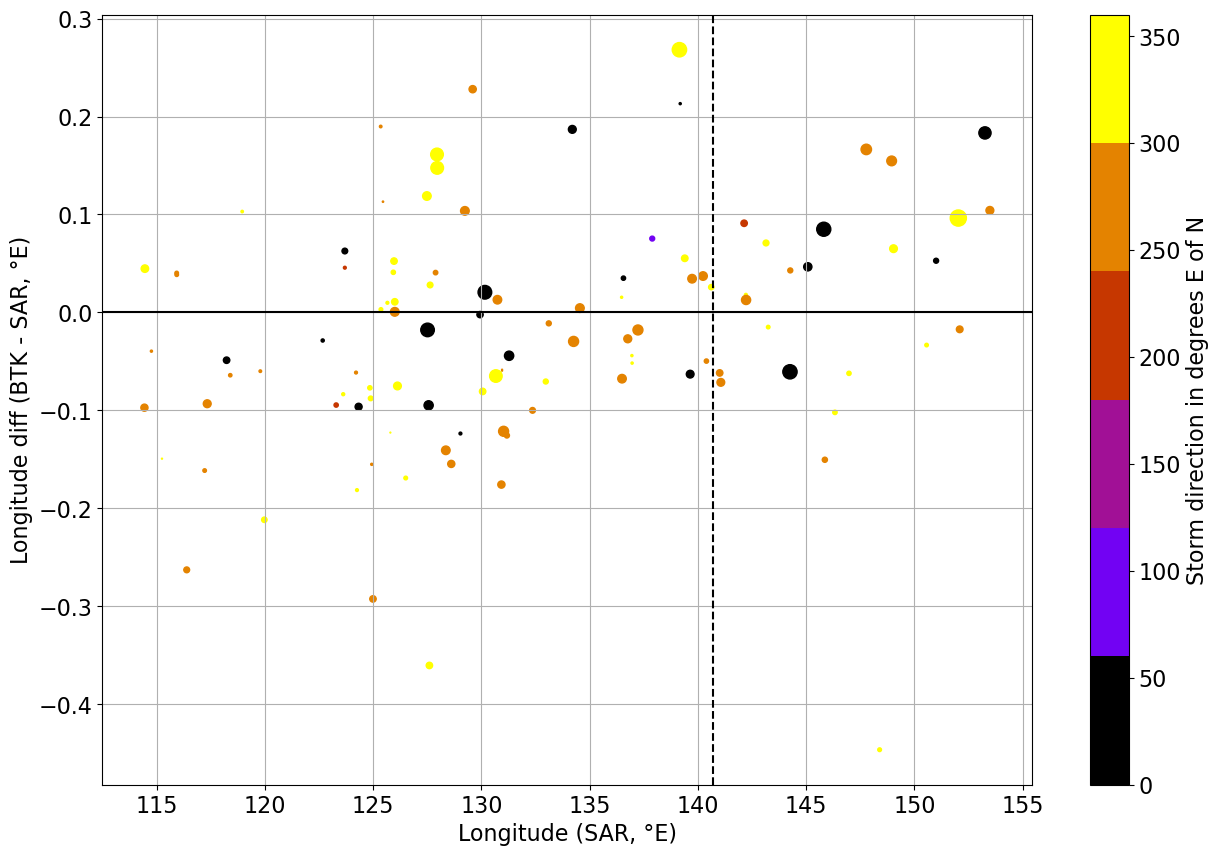

In [13]:
plt.scatter(dwp.lon, dwp.lon_ibt - dwp.lon, c=dwp.storm_dir_ibt, s=dwp.storm_speed_ibt ** 2 , cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Storm direction in degrees E of N')
plt.axhline(c='k')
plt.axvline(140.7, c='k', linestyle='dashed')
plt.xlabel('Longitude (SAR, °E)')
plt.ylabel('Longitude diff (BTK - SAR, °E)')
plt.grid()

#### Lat

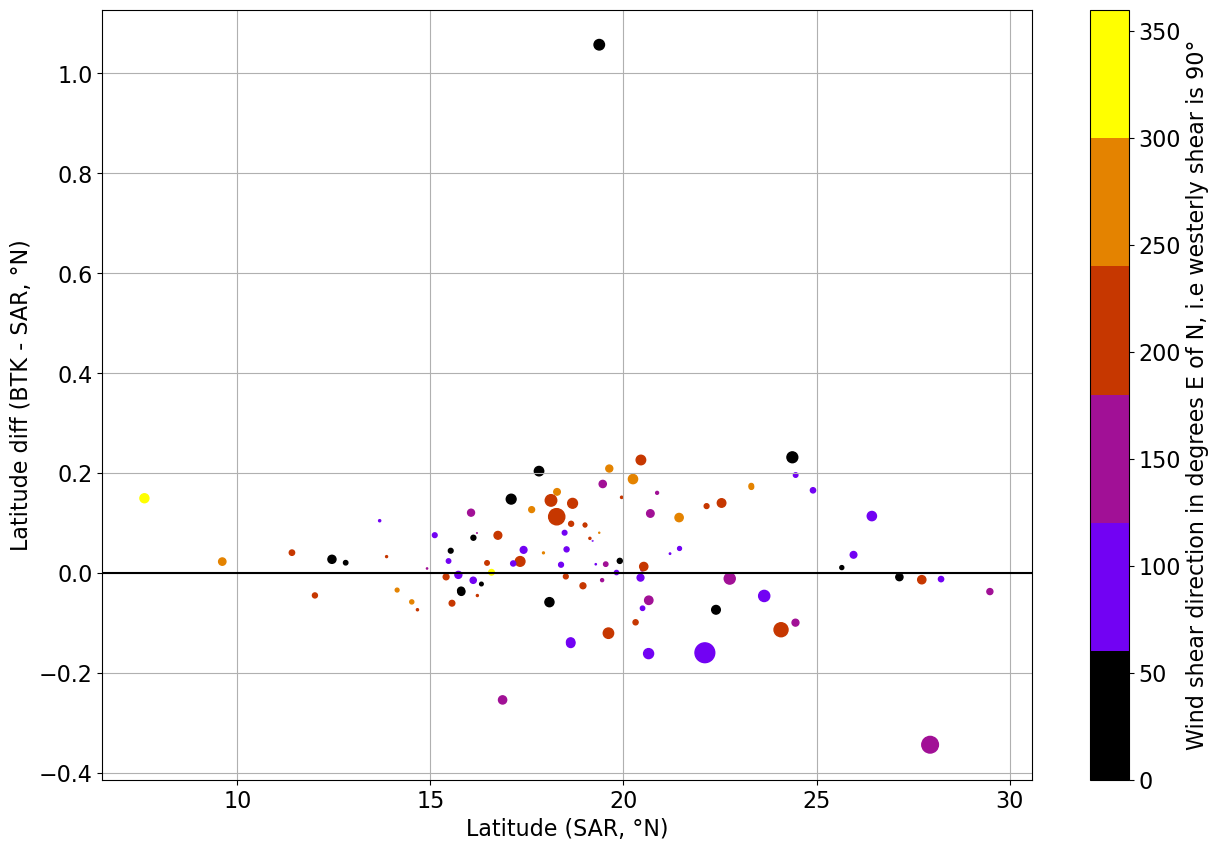

In [21]:
plt.scatter(dwp.lat, dwp.lat_ibt - dwp.lat, c=dwp.wsd_pmd, s=dwp.vws_pmd ** 2 * 0.5, cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Wind shear direction in degrees E of N, i.e westerly shear is 90°')
plt.axhline(c='k')
# plt.axvline(140.7, c='k', linestyle='dashed')
plt.xlabel('Latitude (SAR, °N)')
plt.ylabel('Latitude diff (BTK - SAR, °N)')
plt.grid()

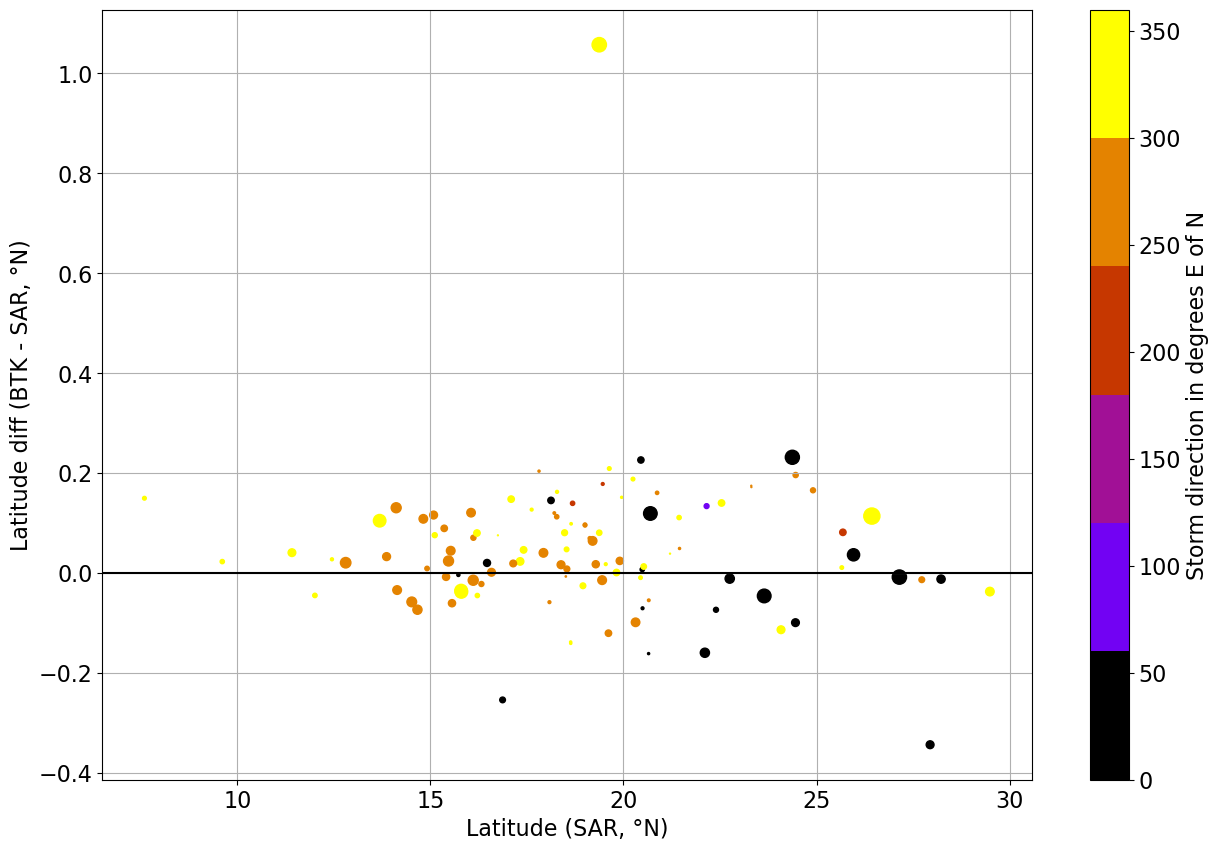

In [23]:
plt.scatter(dwp.lat, dwp.lat_ibt - dwp.lat, c=dwp.storm_dir_ibt, s=dwp.storm_speed_ibt ** 2 , cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Storm direction in degrees E of N')
plt.axhline(c='k')
# plt.axvline(140.7, c='k', linestyle='dashed')
plt.xlabel('Latitude (SAR, °N)')
plt.ylabel('Latitude diff (BTK - SAR, °N)')
plt.grid()

### EP

#### Lon

In [14]:
dep = d.where(d.id.str[:2] == 'ep', drop=True)

(-180.0, -80.0)

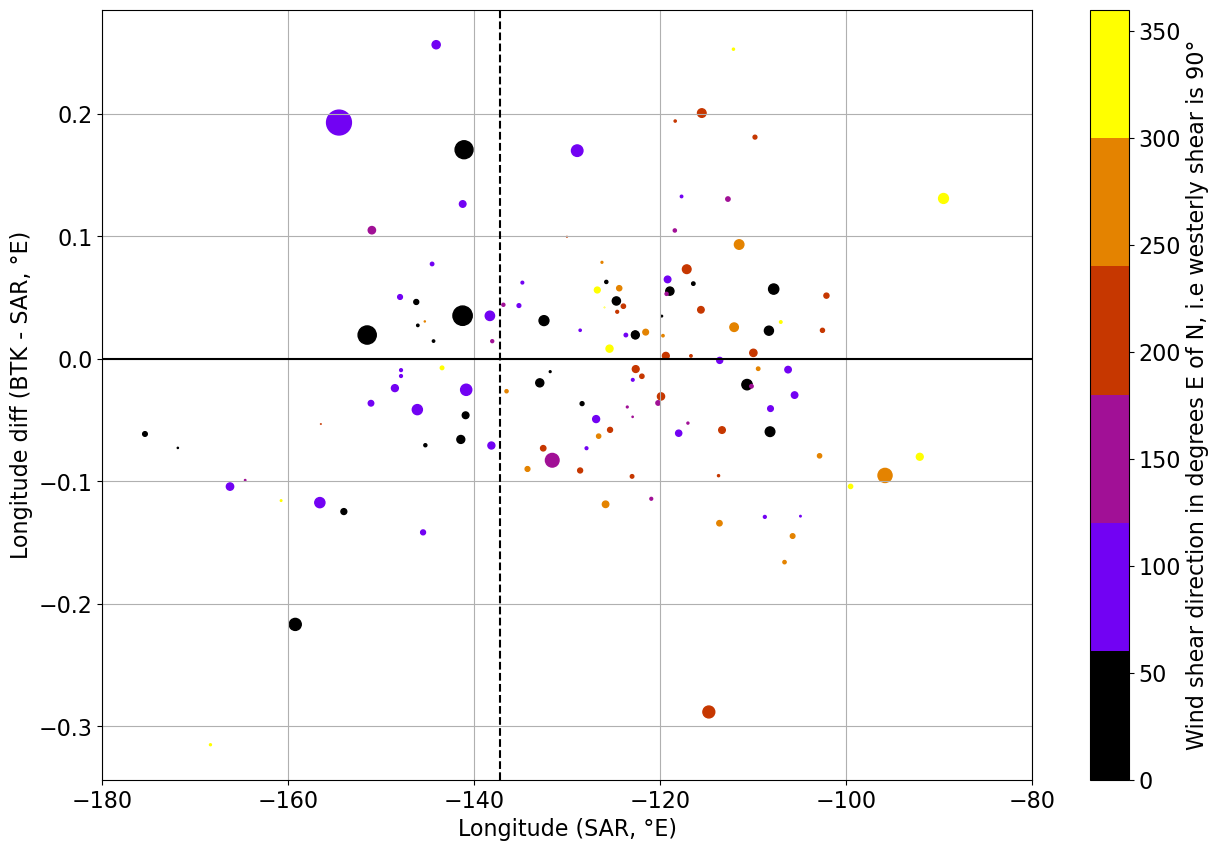

In [15]:
plt.scatter(dep.lon, dep.lon_ibt - dep.lon, c=dep.wsd_pmd, s=dep.vws_pmd ** 2 * 0.5, cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Wind shear direction in degrees E of N, i.e westerly shear is 90°')
plt.axhline(c='k')
plt.axvline(-137.2, c='k', linestyle='dashed')
plt.xlabel('Longitude (SAR, °E)')
plt.ylabel('Longitude diff (BTK - SAR, °E)')
plt.grid()
plt.xlim(-180, -80)

(-180.0, -80.0)

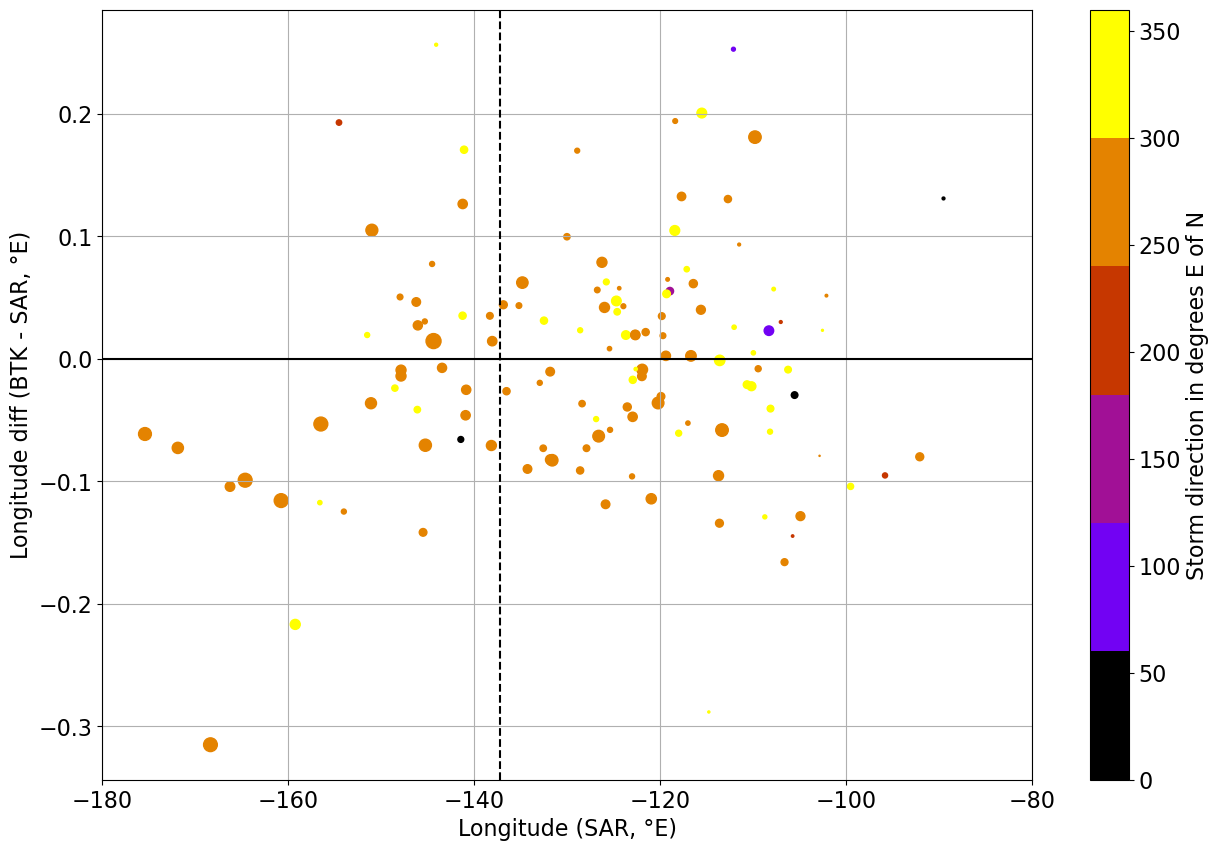

In [16]:
plt.scatter(dep.lon, dep.lon_ibt - dep.lon, c=dep.storm_dir_ibt, s=dep.storm_speed_ibt ** 2 , cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Storm direction in degrees E of N')
plt.axhline(c='k')
plt.axvline(-137.2, c='k', linestyle='dashed')
plt.xlabel('Longitude (SAR, °E)')
plt.ylabel('Longitude diff (BTK - SAR, °E)')
plt.grid()
plt.xlim(-180, -80)

#### Lat

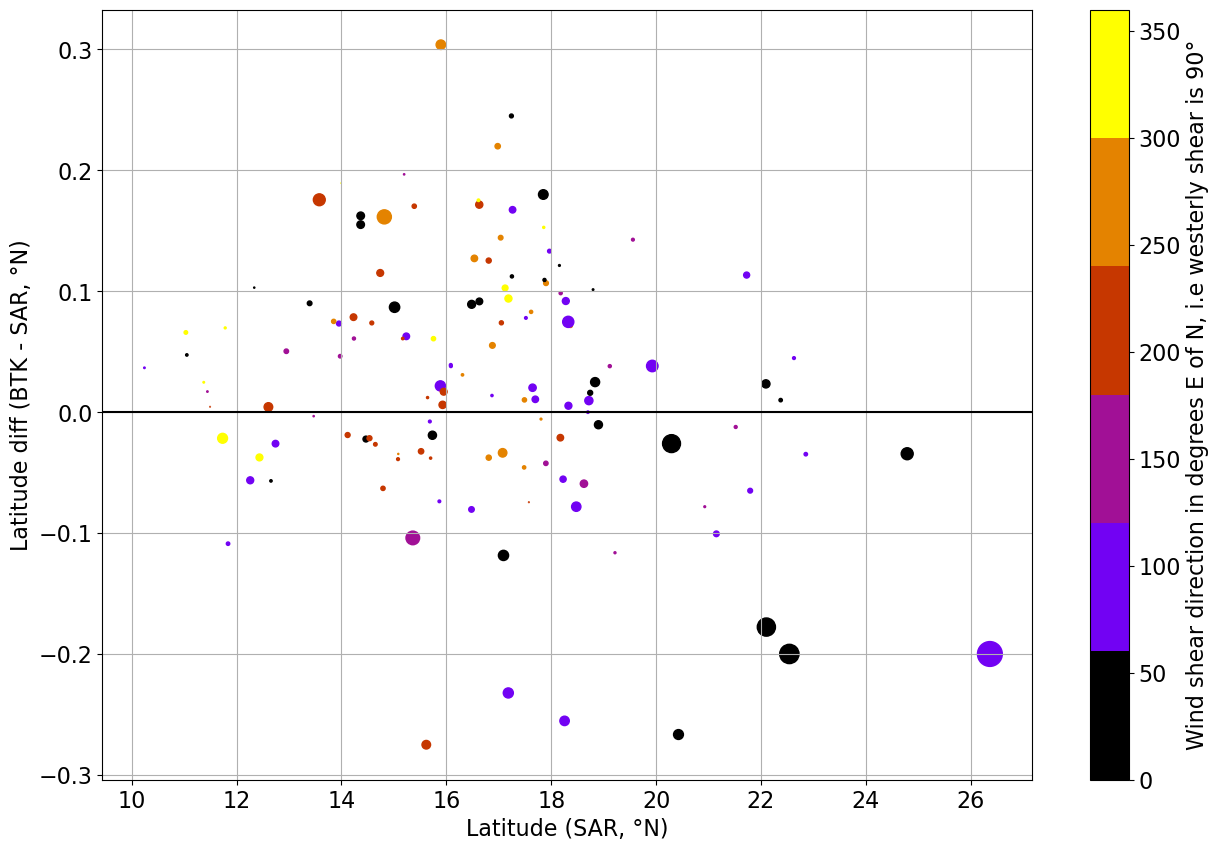

In [25]:
plt.scatter(dep.lat, dep.lat_ibt - dep.lat, c=dep.wsd_pmd, s=dep.vws_pmd ** 2 * 0.5, cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Wind shear direction in degrees E of N, i.e westerly shear is 90°')
plt.axhline(c='k')
# plt.axvline(-137.2, c='k', linestyle='dashed')
plt.xlabel('Latitude (SAR, °N)')
plt.ylabel('Latitude diff (BTK - SAR, °N)')
plt.grid()
# plt.xlim(-180, -80)

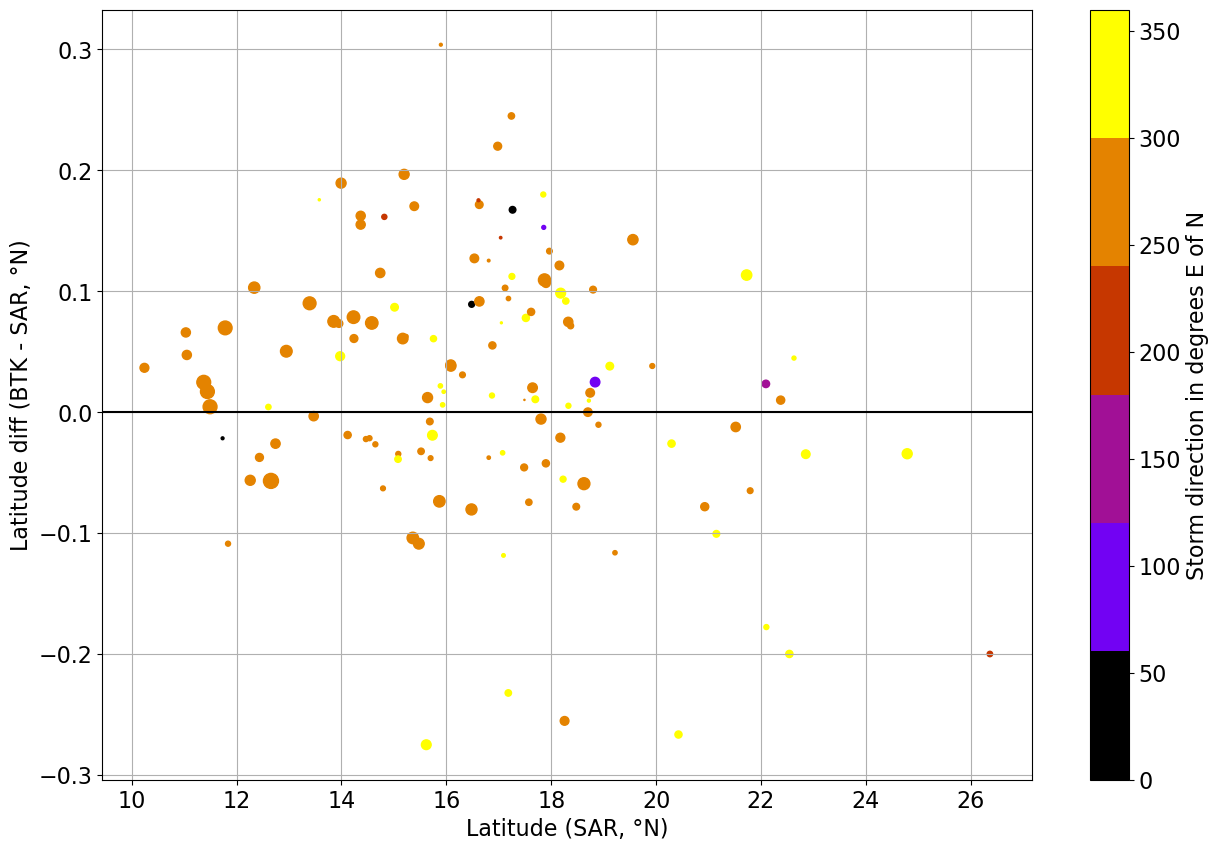

In [26]:
plt.scatter(dep.lat, dep.lat_ibt - dep.lat, c=dep.storm_dir_ibt, s=dep.storm_speed_ibt ** 2 , cmap=plt.get_cmap('gnuplot', 6), vmin=0, vmax=360)
plt.colorbar(label='Storm direction in degrees E of N')
plt.axhline(c='k')
# plt.axvline(-137.2, c='k', linestyle='dashed')
plt.xlabel('Latitude (SAR, °N)')
plt.ylabel('Latitude diff (BTK - SAR, °N)')
plt.grid()
# plt.xlim(-180, -80)